<a href="https://colab.research.google.com/github/priyannshuppal/marketing-analytics-project/blob/main/EndtoEndProject_Marketing_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# import required packages to work with
import numpy as np
import pandas as pd
import datetime as dt

# import required packages for data visuals
import matplotlib.pyplot as plt
import seaborn as sns



### Import datasets

In [12]:
orders = pd.read_csv("/content/ORDERS.csv")
order_payment  = pd.read_csv("/content/ORDER_PAYMENTS.csv")
order_items  = pd.read_csv("/content/ORDER_ITEMS.csv")
order_review  = pd.read_csv("/content/ORDER_REVIEW_RATINGS.csv")
customer = pd.read_csv("/content/CUSTOMERS.csv")
seller = pd.read_csv("/content/SELLERS.csv")
product = pd.read_csv("/content/PRODUCTS.csv")
geo_location = pd.read_csv("/content/GEO_LOCATION.csv")

### DATA PREPRATION | DATA CLEANING | DATA WRANGLING

In [13]:
# convert into date columns
orders.order_purchase_timestamp = pd.to_datetime(orders.order_purchase_timestamp, format="%m/%d/%Y %H:%M")
orders.order_approved_at = pd.to_datetime(orders.order_approved_at, format="%m/%d/%Y %H:%M")
orders.order_delivered_carrier_date = pd.to_datetime(orders.order_delivered_carrier_date, format="%m/%d/%Y %H:%M")
orders.order_delivered_customer_date = pd.to_datetime(orders.order_delivered_customer_date, format="%m/%d/%Y %H:%M")
orders.order_estimated_delivery_date = pd.to_datetime(orders.order_estimated_delivery_date, format="%m/%d/%Y %H:%M")

In [14]:
print(order_items.columns)


Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')


In [15]:
order_items.shipping_limit_date = pd.to_datetime(order_items.shipping_limit_date, format="%m/%d/%Y %H:%M")

In [16]:
order_review.review_creation_date = pd.to_datetime(order_review.review_creation_date, format="%m/%d/%Y %H:%M")
order_review.review_answer_timestamp = pd.to_datetime(order_review.review_answer_timestamp, format="%m/%d/%Y %H:%M")

In [17]:
##################################################################

### Merge all table - 360 dataset

In [18]:
tb = pd.merge(left=orders, right=customer, how="inner", on="customer_id" )
tb1 =pd.merge(left=tb, right=order_items, how="inner", on="order_id")
tb2= pd.merge(left=tb1 , right=order_payment, how="inner", on="order_id")
tb3 = pd.merge(left=tb2 , right=order_review, how="inner", on="order_id")
tb4 = pd.merge(left=tb3 , right=product, how="inner", on="product_id")
final_order = pd.merge(left=tb4 , right=seller, how="inner", on="seller_id")

final_order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,Chhuikhadan,Chhattisgarh
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,Chhuikhadan,Chhattisgarh
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,Chhuikhadan,Chhattisgarh
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570,Anantapur,Andhra Pradesh
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840,Freelandgunj,Gujarat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118310,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:00,2018-02-06 13:10:00,2018-02-07 23:22:00,2018-02-28 17:37:00,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,...,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,17602,Mancherial,Andhra Pradesh
118311,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:00,2017-08-27 15:04:00,2017-08-28 20:52:00,2017-09-21 11:24:00,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,...,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,8290,Akkarampalle,Andhra Pradesh
118312,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:00,2018-01-08 21:36:00,2018-01-12 15:35:00,2018-01-25 23:32:00,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,37175,Dalurband,West Bengal
118313,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:00,2018-01-08 21:36:00,2018-01-12 15:35:00,2018-01-25 23:32:00,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,37175,Dalurband,West Bengal


In [19]:
final_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118315 entries, 0 to 118314
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       118315 non-null  object        
 1   customer_id                    118315 non-null  object        
 2   order_status                   118315 non-null  object        
 3   order_purchase_timestamp       118315 non-null  datetime64[ns]
 4   order_approved_at              118300 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117061 non-null  datetime64[ns]
 6   order_delivered_customer_date  115727 non-null  datetime64[ns]
 7   order_estimated_delivery_date  118315 non-null  datetime64[ns]
 8   customer_unique_id             118315 non-null  object        
 9   customer_zip_code_prefix       118315 non-null  int64         
 10  customer_city                  118315 non-null  object        
 11  

In [20]:
final_order.sort_values(by="order_purchase_timestamp", inplace=True, ignore_index=True)

### EDA | DATA PROFILING | DATA INSPECTION

#### 1. Perform Detailed exploratory analysis
#### a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total
#### products, Total categories, Total sellers, Total locations, Total channels, Total
#### payment methods etc…)

In [21]:
Total_Revenue = final_order.loc[::,["order_id" , "product_category_name" , "payment_value"]].payment_value.sum()
Total_Quantity = final_order.loc[final_order.order_status != "canceled",["order_id"]].shape[0]
Total_Products = final_order.product_id.nunique()
Total_Categories = final_order.product_category_name.nunique()
Total_customers = final_order.customer_id.nunique()
Total_sellers = final_order.seller_id.nunique()
Total_location = geo_location.geolocation_zip_code_prefix.nunique()
Total_payment_method = final_order.payment_type.nunique()
Total_order_status = np.round((final_order.order_status.value_counts() / final_order.order_status.count())*100, 2)

print(f"Total revenue generated - {Total_Revenue}")
print(f"Total quantity ordered - {Total_Quantity}")
print(f"Total products we have - {Total_Products}")
print(f"Total categories we have - {Total_Categories}")
print(f"Total no. of seller we have, who help in our business - {Total_sellers}")
print(f"Total no. of location where we have our services - {Total_location}")
print(f"Total no. of customer who are in our business - {Total_customers}")
print(f"Total no. of payment methods we are accepting - {Total_payment_method}")
print("\n")
print(f"Percentage of order status -\n{Total_order_status}")


Total revenue generated - 20418288.15
Total quantity ordered - 117745
Total products we have - 32951
Total categories we have - 71
Total no. of seller we have, who help in our business - 3095
Total no. of location where we have our services - 19015
Total no. of customer who are in our business - 98665
Total no. of payment methods we are accepting - 4


Percentage of order status -
order_status
delivered      97.81
shipped         1.06
canceled        0.48
invoiced        0.32
processing      0.32
unavailable     0.01
approved        0.00
Name: count, dtype: float64


#### b. Understanding how many new customers acquired every month

In [22]:
cust_data =  final_order.loc[::,["order_id", "customer_id" , "order_purchase_timestamp"]]

In [23]:
cust_data

,order_id,customer_id,order_purchase_timestamp
0,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:00
1,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:00
2,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,2016-09-05 00:15:00
3,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,2016-10-02 22:07:00
4,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,2016-10-03 09:44:00
...,...,...,...
118310,0b223d92c27432930dfe407c6aea3041,e60df9449653a95af4549bbfcb18a6eb,2018-08-29 14:18:00
118311,168626408cb32af0ffaf76711caae1dc,6e353700bc7bcdf6ebc15d6de16d7002,2018-08-29 14:18:00
118312,03ef5dedbe7492bdae72eec50764c43f,496630b6740bcca28fce9ba50d8a26ef,2018-08-29 14:52:00
118313,35a972d7f8436f405b56e36add1a7140,898b7fee99c4e42170ab69ba59be0a8b,2018-08-29 15:00:00


In [24]:
# Get the first purchase date of every customers

first_purchase = cust_data.groupby(by="customer_id").agg({"order_purchase_timestamp": "min"})
first_purchase["order_month"] = first_purchase.order_purchase_timestamp.dt.strftime("%B-%Y") # created for summary purpose

first_purchase["month_no"] = first_purchase.order_purchase_timestamp.dt.month                # created for sorting purpose
first_purchase["year"] = first_purchase.order_purchase_timestamp.dt.year                     # created for sorting purpose

In [25]:
first_purchase

,order_purchase_timestamp,order_month,month_no,year
customer_id,,,,
00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:00,November-2017,11,2017
000161a058600d5901f007fab4c27140,2017-07-16 09:40:00,July-2017,7,2017
0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:00,February-2017,2,2017
0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:00,August-2017,8,2017
000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:00,April-2018,4,2018
...,...,...,...,...
fffcb937e9dd47a13f05ecb8290f4d3e,2018-03-17 00:55:00,March-2018,3,2018
fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:00,March-2018,3,2018
fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:00,May-2018,5,2018


In [26]:
# got which customer made first purchase in which month, will be consider as a new customer

first_purchase.sort_values(by="order_purchase_timestamp")

,order_purchase_timestamp,order_month,month_no,year
customer_id,,,,
08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:00,September-2016,9,2016
683c54fc24d40ee9f8a6fc179fd9856c,2016-09-05 00:15:00,September-2016,9,2016
b106b360fe2ef8849fbbd056f777b4d5,2016-10-02 22:07:00,October-2016,10,2016
355077684019f7f60a031656bd7262b8,2016-10-03 09:44:00,October-2016,10,2016
7ec40b22510fdbea1b08921dd39e63d8,2016-10-03 16:56:00,October-2016,10,2016
...,...,...,...,...
6e353700bc7bcdf6ebc15d6de16d7002,2018-08-29 14:18:00,August-2018,8,2018
e60df9449653a95af4549bbfcb18a6eb,2018-08-29 14:18:00,August-2018,8,2018
496630b6740bcca28fce9ba50d8a26ef,2018-08-29 14:52:00,August-2018,8,2018


In [27]:
# got the numbers of new customers by month-year

new_cust = pd.crosstab(index=[first_purchase.year, first_purchase.month_no, first_purchase.order_month],
                       columns="no_of_new_customers",
                       values=first_purchase.index,
                       aggfunc="count").reset_index()

new_cust[["order_month", "no_of_new_customers"]]

col_0,order_month,no_of_new_customers
0,September-2016,2
1,October-2016,308
2,December-2016,1
3,January-2017,789
4,February-2017,1733
5,March-2017,2641
6,April-2017,2391
7,May-2017,3660
8,June-2017,3217
9,July-2017,3969


/tmp/ipython-input-3264502893.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  linechart.set_xticklabels(labels=new_cust.order_month, rotation=90, horizontalalignment='center')


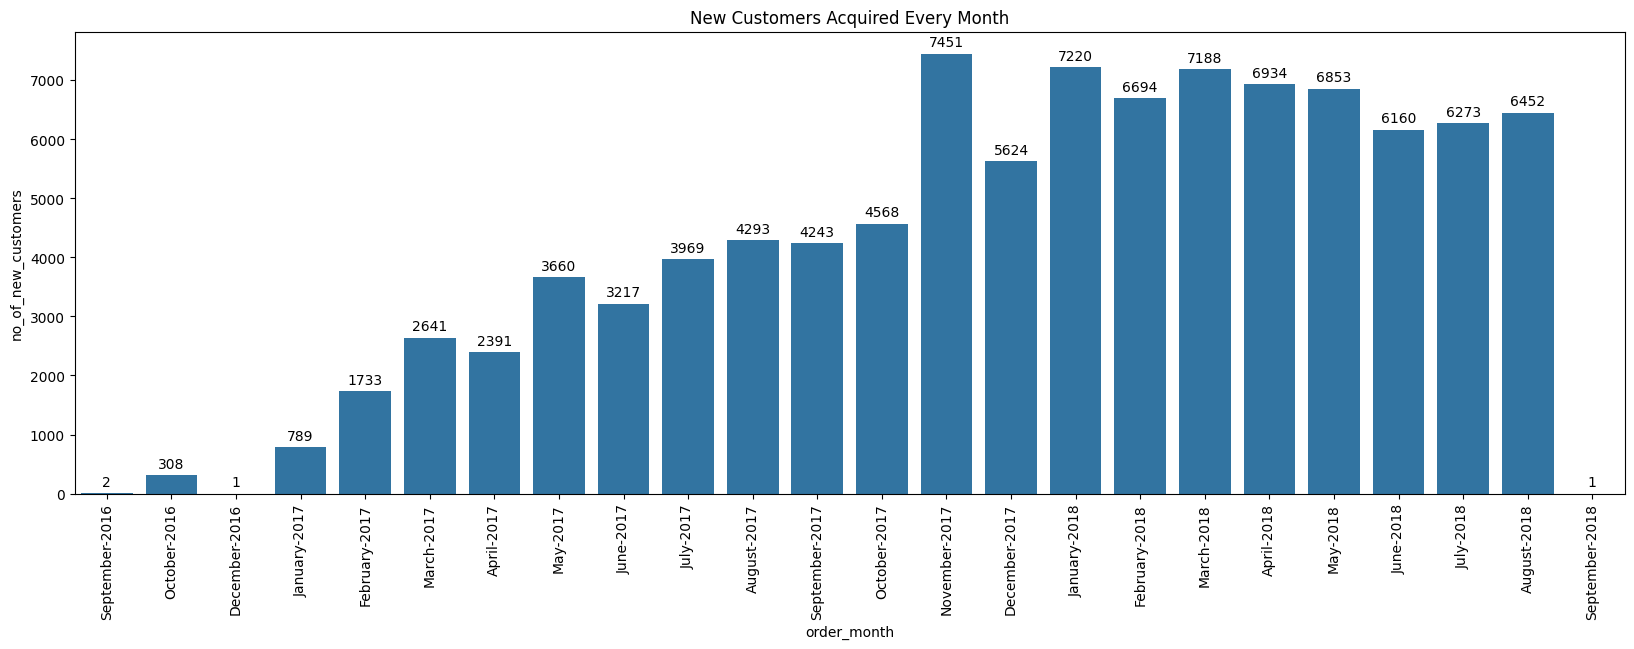

In [28]:
plt.figure(figsize=(20,6))

linechart = sns.barplot(x=new_cust.order_month, y=new_cust.no_of_new_customers)

linechart.set_xticklabels(labels=new_cust.order_month, rotation=90, horizontalalignment='center')

for i in linechart.containers:
    labels= [int(x.get_height()) for x in i]
    linechart.bar_label(i, labels=labels, padding=3)

plt.title("New Customers Acquired Every Month")
plt.show()

#### c. Understand the retention of customers on month on month basis

In [29]:
data = orders.loc[::,["customer_id","order_purchase_timestamp"]]

data

,customer_id,order_purchase_timestamp
0,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00
1,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:00
2,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:00
3,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:00
4,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:00
...,...,...
99436,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:00
99437,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:00
99438,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:00
99439,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:00


In [30]:
# create invoice months to get year, month

data["Invoice_month"] = data["order_purchase_timestamp"].apply(lambda x: dt.datetime(x.year, x.month, 1))

In [31]:
#create cohort month in which customer make first purchase

data["cohort_month"] = data.groupby("customer_id")["Invoice_month"].transform("min")

In [32]:
# func to get day month year from a date columns

def get_date_elements(df, col):
    year = df[col].dt.year
    month = df[col].dt.month
    day  = df[col].dt.day
    return day, month, year


In [33]:
_, invoice_month, invoice_year = get_date_elements(data, "Invoice_month")
_, FirstPurchase_month, FirstPurchase_year = get_date_elements(data, "cohort_month")


In [34]:
# cohort_index -For how many months is the customer in this business?

year_diff = invoice_year - FirstPurchase_year
month_diff = invoice_month - FirstPurchase_month
data["cohort_index"] = year_diff*12+month_diff+1


In [35]:
data

,customer_id,order_purchase_timestamp,Invoice_month,cohort_month,cohort_index
0,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,2017-10-01,2017-10-01,1
1,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:00,2018-07-01,2018-07-01,1
2,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:00,2018-08-01,2018-08-01,1
3,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:00,2017-11-01,2017-11-01,1
4,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:00,2018-02-01,2018-02-01,1
...,...,...,...,...,...
99436,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:00,2017-03-01,2017-03-01,1
99437,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:00,2018-02-01,2018-02-01,1
99438,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:00,2017-08-01,2017-08-01,1
99439,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:00,2018-01-01,2018-01-01,1


In [36]:
# count of the customers with respect to first month and how long cust is in business

cohort_data = data.groupby(by=["cohort_month", "cohort_index"])["customer_id"].nunique().reset_index()

cohort_data.head()

,cohort_month,cohort_index,customer_id
0,2016-09-01,1,4
1,2016-10-01,1,324
2,2016-12-01,1,1
3,2017-01-01,1,800
4,2017-02-01,1,1780


In [37]:
# crosstab

cohort_table = pd.pivot(data=cohort_data, index="cohort_month", columns="cohort_index", values="customer_id")

cohort_table.head()

cohort_index,1
cohort_month,
2016-09-01,4
2016-10-01,324
2016-12-01,1
2017-01-01,800
2017-02-01,1780


In [38]:
# change index name

cohort_table.index = cohort_table.index.strftime("%B %Y")

<Axes: xlabel='cohort_index', ylabel='cohort_month'>

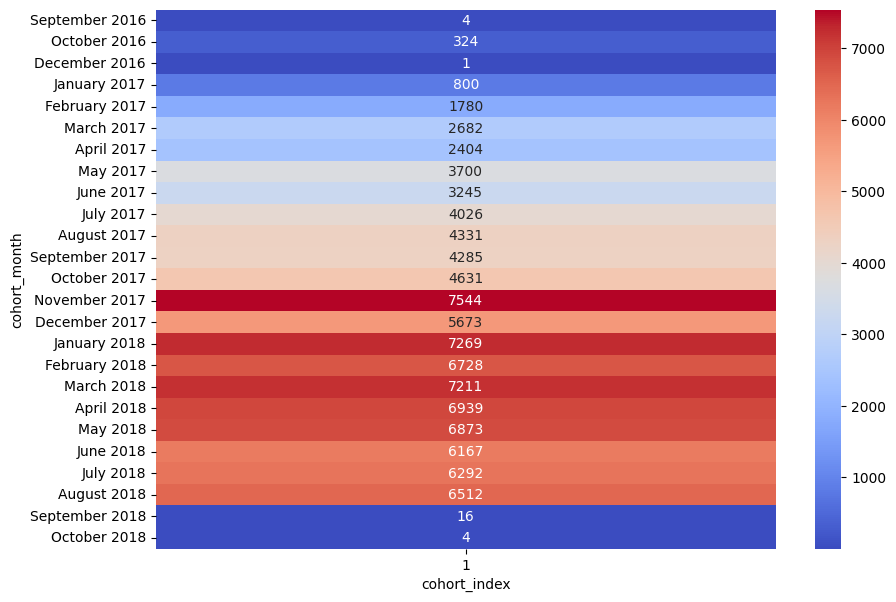

In [39]:
# heatmaps

plt.figure(figsize=(10,7))
sns.heatmap(data=cohort_table, annot=True, fmt="0", cmap="coolwarm")

##### FINDINGS -  from the above cohort analysis i say that all the customers retained in business for 1 month only, some customers have single items in their order or multiple items in order but on the same date time and they didn't make any other purchase or transaction on another date.

### d. How the revenues from existing/new customers on month on month basis

In [40]:
order_item_tb = pd.merge(left=order_items, right=orders, how="inner", on="order_id")

order_item_tb.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:00,2017-09-13 09:45:00,2017-09-19 18:34:00,2017-09-20 23:43:00,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:00,2017-04-26 11:05:00,2017-05-04 14:35:00,2017-05-12 16:04:00,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:00,2018-01-14 14:48:00,2018-01-16 12:36:00,2018-01-22 13:19:00,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:00,2018-08-08 10:10:00,2018-08-10 13:28:00,2018-08-14 13:32:00,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:00,2017-02-04 14:10:00,2017-02-16 09:46:00,2017-03-01 16:42:00,2017-03-17


In [41]:
order_item_tb["revenue"] = order_item_tb.price + order_item_tb.freight_value

In [42]:
order_item_tb

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,revenue
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:00,2017-09-13 09:45:00,2017-09-19 18:34:00,2017-09-20 23:43:00,2017-09-29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:00,2017-04-26 11:05:00,2017-05-04 14:35:00,2017-05-12 16:04:00,2017-05-15,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:00,2018-01-14 14:48:00,2018-01-16 12:36:00,2018-01-22 13:19:00,2018-02-05,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:00,2018-08-08 10:10:00,2018-08-10 13:28:00,2018-08-14 13:32:00,2018-08-20,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:00,2017-02-04 14:10:00,2017-02-16 09:46:00,2017-03-01 16:42:00,2017-03-17,218.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:00,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:00,2018-04-25 04:11:00,2018-04-25 12:09:00,2018-05-10 22:56:00,2018-05-18,343.40
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:00,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:00,2018-07-17 04:31:00,2018-07-17 08:05:00,2018-07-23 20:31:00,2018-08-01,386.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:00,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:00,2017-10-24 17:14:00,2017-10-26 15:13:00,2017-10-28 12:22:00,2017-11-10,116.85
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:00,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:00,2017-08-15 00:04:00,2017-08-15 19:02:00,2017-08-16 21:59:00,2017-08-25,64.71


In [43]:
order_item_tb["year_month"] = order_item_tb.order_purchase_timestamp.apply(lambda x: dt.datetime.strftime(x, "%Y-%m"))

In [44]:
Revenue_MoM =order_item_tb.groupby(by="year_month").agg({"revenue":"sum"})

Revenue_MoM

,revenue
year_month,
2016-09,354.75
2016-10,56808.84
2016-12,19.62
2017-01,137188.49
2017-02,286280.62
2017-03,432048.59
2017-04,412422.24
2017-05,586190.95
2017-06,502963.04


/tmp/ipython-input-346082880.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barchart = sns.barplot(x=Revenue_MoM.index, y=Revenue_MoM.revenue, palette="YlOrBr")
/tmp/ipython-input-346082880.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barchart.set_xticklabels(labels=Revenue_MoM.index, rotation=90, horizontalalignment='center')


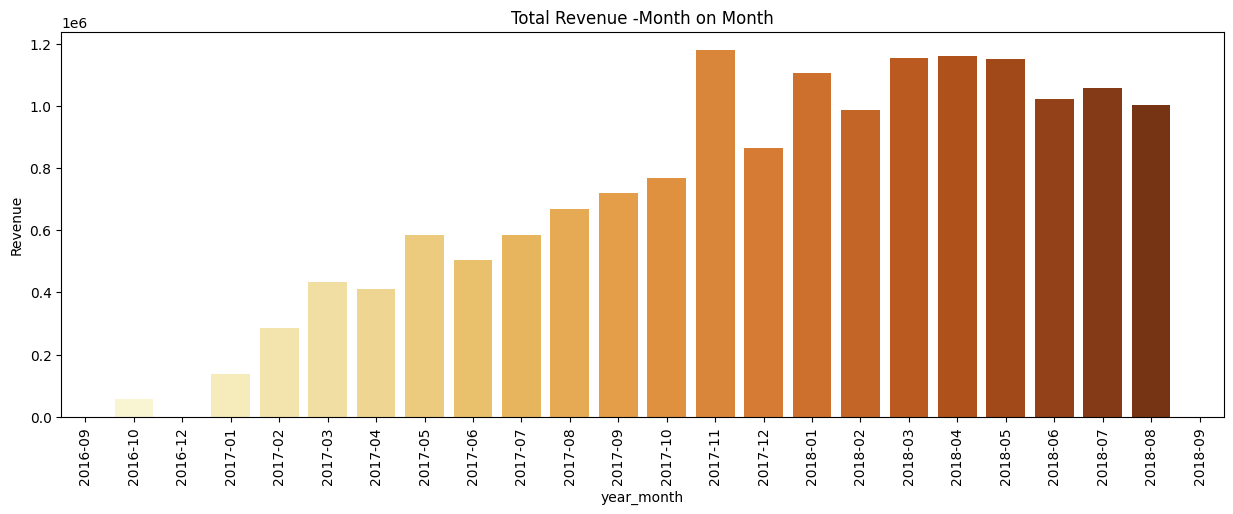

In [45]:
plt.figure(figsize=(15,5))
plt.ylabel("Revenue")
plt.title("Total Revenue -Month on Month")

barchart = sns.barplot(x=Revenue_MoM.index, y=Revenue_MoM.revenue, palette="YlOrBr")

barchart.set_xticklabels(labels=Revenue_MoM.index, rotation=90, horizontalalignment='center')

plt.show()


#### e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

In [46]:
sales_data = pd.merge(left=order_items, right=product, how="inner", on="product_id")
sales_data["months"] = sales_data.shipping_limit_date.apply(lambda x: dt.datetime.strftime(x, "%m") )
sales_data["weekdays"] = sales_data.shipping_limit_date.apply(lambda x: dt.datetime.strftime(x, "%A") )
sales_data["time_in_day"] = sales_data.shipping_limit_date.apply(lambda x: dt.datetime.strftime(x, "%H"))

In [47]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   order_id                    112650 non-null  object        
 1   order_item_id               112650 non-null  int64         
 2   product_id                  112650 non-null  object        
 3   seller_id                   112650 non-null  object        
 4   shipping_limit_date         112650 non-null  datetime64[ns]
 5   price                       112650 non-null  float64       
 6   freight_value               112650 non-null  float64       
 7   product_category_name       111023 non-null  object        
 8   product_name_lenght         111047 non-null  float64       
 9   product_description_lenght  111047 non-null  float64       
 10  product_photos_qty          111047 non-null  float64       
 11  product_weight_g            112632 non-

In [48]:
monthly_qty_sales = sales_data.groupby(by="months").agg({"product_id": "count",
                                     "price":"sum"}).reset_index().rename(columns={"product_id": "quantity",
                                                                                      "price":"sales"})
monthly_qty_sales

,months,quantity,sales
0,01,8173,925403.92
1,02,9243,1065356.84
2,03,11510,1373770.44
3,04,10003,1267078.00
4,05,12915,1590014.01
5,06,10698,1339737.89
6,07,10788,1276414.18
7,08,13857,1632241.04
8,09,4827,631743.09
9,10,5554,707600.78


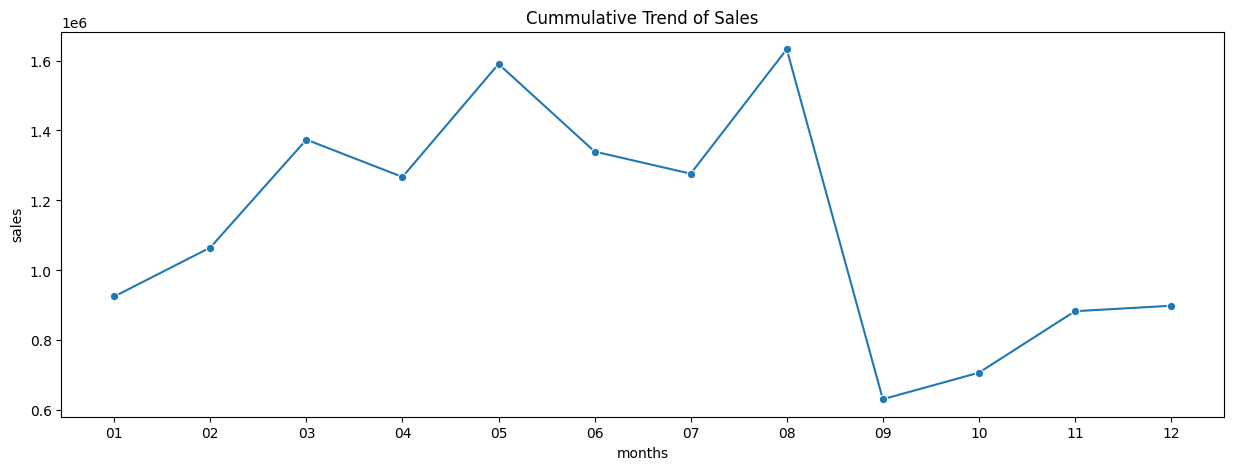

In [49]:
plt.figure(figsize=(15,5))
plt.title("Cummulative Trend of Sales")
sns.lineplot(x=monthly_qty_sales.months, y=monthly_qty_sales.sales, marker="o", legend=True)
plt.show()

In [50]:
weekly_qty_sales = sales_data.groupby(by="weekdays").agg({"product_id": "count",
                                     "price":"sum"}).reset_index().rename(columns={"product_id": "quantity",
                                                                                      "price":"sales"})

weekly_qty_sales["dayofweek_no"] = np.where(weekly_qty_sales.weekdays=="Monday", 1,

                                           np.where(weekly_qty_sales.weekdays=="Tuesday",2,

                                                     np.where(weekly_qty_sales.weekdays=="Wednesday",3,

                                                               np.where(weekly_qty_sales.weekdays=="Thursday",4,

                                                                         np.where(weekly_qty_sales.weekdays=="Friday",5,

                                                                                   np.where(weekly_qty_sales.weekdays=="Saturday",6,0))))))

weekly_qty_sales.sort_values(by="dayofweek_no", ascending=True, inplace=True)

weekly_qty_sales

,weekdays,quantity,sales,dayofweek_no
3,Sunday,2759,356031.13,0
1,Monday,20750,2465891.41,1
5,Tuesday,20079,2391326.09,2
6,Wednesday,20638,2494393.38,3
4,Thursday,30476,3702324.97,4
0,Friday,17487,2119002.23,5
2,Saturday,461,62674.49,6


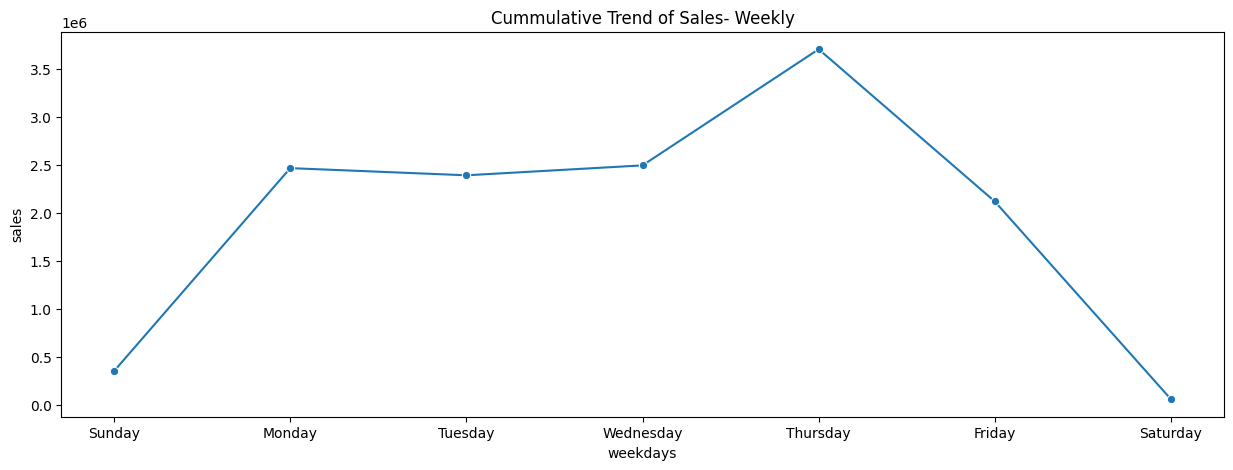

In [51]:
plt.figure(figsize=(15,5))
plt.title("Cummulative Trend of Sales- Weekly")
sns.lineplot(x=weekly_qty_sales.weekdays, y=weekly_qty_sales.sales, marker="o",legend=True)
plt.show()

In [52]:
hourly_qty_sales = sales_data.groupby(by="time_in_day").agg({"product_id": "count",
                                     "price":"sum"}).reset_index().rename(columns={"product_id": "quantity",
                                                                                      "price":"sales"})

hourly_qty_sales

,time_in_day,quantity,sales
0,00,2403,277950.78
1,01,1649,185955.99
2,02,8407,856307.77
3,03,6377,637271.49
4,04,4082,422136.33
5,05,1061,103318.70
6,06,1073,139281.80
7,07,1600,200374.96
8,08,2637,349521.84
9,09,4605,595254.96


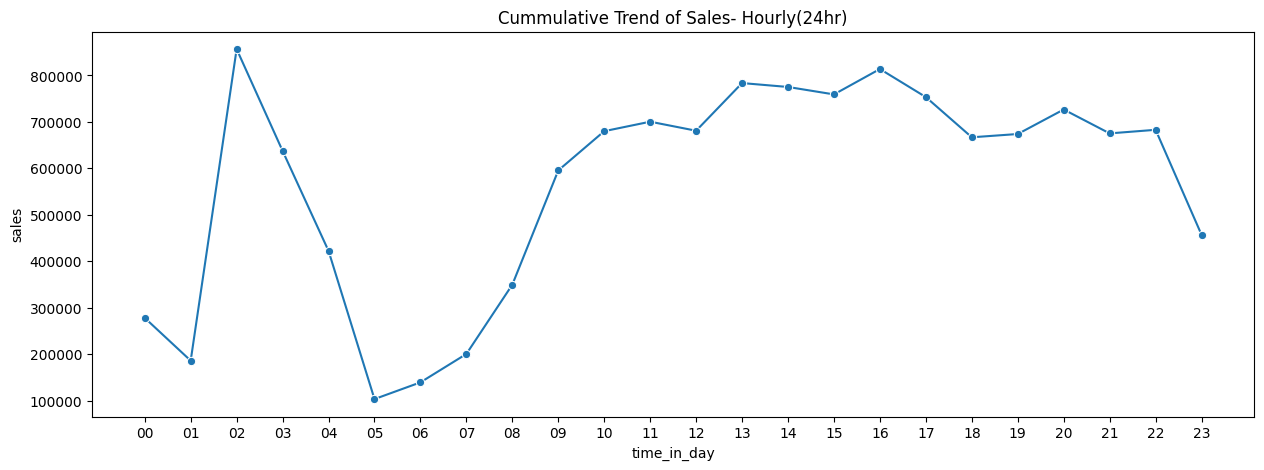

In [53]:
plt.figure(figsize=(15,5))
plt.title("Cummulative Trend of Sales- Hourly(24hr)")
sns.lineplot(x=hourly_qty_sales.time_in_day, y=hourly_qty_sales.sales,marker="o", legend=True)
plt.show()

In [54]:
category = pd.merge(left=order_items, right=product, how="left", on="product_id")

category.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93,Pet_Shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87,Furniture_Decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79,Perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14,Garden_Tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [55]:
sales_by_category = category.groupby(by="product_category_name").agg({"product_id":"count",
                                                              "price":"sum"}).reset_index().rename(columns={"product_id":"quantity",
                                                                                                            "price":"sales"})

sales_by_category

,product_category_name,quantity,sales
0,Agro_Industry_And_Commerce,212,72530.47
1,Air_Conditioning,297,55024.96
2,Art,209,24202.64
3,Arts_And_Craftmanship,24,1814.01
4,Audio,364,50688.50
...,...,...,...
66,Stationery,2517,230943.23
67,Tablets_Printing_Image,83,7528.41
68,Telephony,4545,323667.53
69,Toys,4117,483946.60


In [56]:
loc_by_sale = final_order[["order_id", "customer_id", "customer_unique_id",
                           "customer_city", "customer_state",
                           "product_id","product_category_name",
                           "price", "freight_value","seller_id","seller_city","seller_state"]]

loc_by_sale

,order_id,customer_id,customer_unique_id,customer_city,customer_state,product_id,product_category_name,price,freight_value,seller_id,seller_city,seller_state
0,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,b7d76e111c89f7ebf14761390f0f7d17,Dholka,Gujarat,c1488892604e4ba5cff5b4eb4d595400,Furniture_Decor,39.99,31.67,1554a68530182680ad5c8b042c3ab563,Tirthahalli,Karnataka
1,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,b7d76e111c89f7ebf14761390f0f7d17,Dholka,Gujarat,f293394c72c9b5fafd7023301fc21fc2,Furniture_Decor,32.90,31.67,1554a68530182680ad5c8b042c3ab563,Tirthahalli,Karnataka
2,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,4854e9b3feff728c13ee5fc7d1547e92,Tuni,Andhra Pradesh,f3c2d01a84c947b078e32bbef0718962,Telephony,59.50,15.56,a425f92c199eb576938df686728acd20,Anakapalle,Andhra Pradesh
3,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,0eb1ee9dba87f5b36b4613a65074337c,Akkarampalle,Andhra Pradesh,d2998d7ced12f83f9b832f33cf6507b6,Baby,100.00,9.34,25e6ffe976bd75618accfe16cefcbd0d,Akkarampalle,Andhra Pradesh
4,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,32ea3bdedab835c3aa6cb68ce66565ef,Akkarampalle,Andhra Pradesh,3ae08df6bcbfe23586dd431c40bddbb7,Watches_Gifts,29.90,15.56,522620dcb18a6b31cd7bdf73665113a9,Dommara Nandyal,Andhra Pradesh
...,...,...,...,...,...,...,...,...,...,...,...,...
118310,0b223d92c27432930dfe407c6aea3041,e60df9449653a95af4549bbfcb18a6eb,5c58de6fb80e93396e2f35642666b693,Anakapalle,Andhra Pradesh,2b4472df15512a2825ae86fd9ae79335,Kitchen_Dining_Laundry_Garden_Furniture,209.00,46.48,67bf6941ba2f1fa1d02c375766bc3e53,Anakapalle,Andhra Pradesh
118311,168626408cb32af0ffaf76711caae1dc,6e353700bc7bcdf6ebc15d6de16d7002,7febafa06d9d8f232a900a2937f04338,Bhatapara,Chhattisgarh,bdcf6a834e8faa30dac3886c7a58e92e,Health_Beauty,45.90,15.39,2a84855fd20af891be03bc5924d2b453,Anantapur,Andhra Pradesh
118312,03ef5dedbe7492bdae72eec50764c43f,496630b6740bcca28fce9ba50d8a26ef,b701bebbdf478f5500348f03aff62121,Vinukonda,Andhra Pradesh,c7f27c5bef2338541c772b5776403e6a,Party_Supplies,24.90,8.33,7d7866a99a8656a42c7ff6352a433410,Akkarampalle,Andhra Pradesh
118313,35a972d7f8436f405b56e36add1a7140,898b7fee99c4e42170ab69ba59be0a8b,24ac2b4327e25baf39f2119e4228976a,Kharsia,Chhattisgarh,d04857e7b4b708ee8b8b9921163edba3,Computers_Accessories,84.99,8.76,9f505651f4a6abe901a56cdc21508025,Akkarampalle,Andhra Pradesh


In [57]:
# seller

sales_of_seller = loc_by_sale.groupby(by=["seller_state","seller_city"]).agg({"product_id": "count",
                                            "price":"sum"}).reset_index().rename(columns={"product_id":"quantity",
                                                                                                            "price":"sales"})
sales_of_seller

,seller_state,seller_city,quantity,sales
0,Andhra Pradesh,Adilabad,685,91205.83
1,Andhra Pradesh,Adoni,1320,206713.85
2,Andhra Pradesh,Akkarampalle,29367,2829456.13
3,Andhra Pradesh,Akkayapalle,426,50240.19
4,Andhra Pradesh,Alwal,1504,195913.45
...,...,...,...,...
529,West Bengal,Jaygaon,4,759.00
530,West Bengal,Khandra,12,496.00
531,West Bengal,Maheshtala,45,2361.06
532,West Bengal,Mal,13,2553.70


In [58]:
# customer
revenue_from_cust = loc_by_sale.groupby(by=["customer_state", "customer_city"]).agg({"product_id": "count",
                                            "price":"sum"}).reset_index().rename(columns={"product_id":"quantity",
                                                                                                            "price":"sales"})
revenue_from_cust

,customer_state,customer_city,quantity,sales
0,Andhra Pradesh,Adilabad,229,25736.07
1,Andhra Pradesh,Adoni,1121,109051.09
2,Andhra Pradesh,Akkarampalle,18728,2021302.58
3,Andhra Pradesh,Akkayapalle,480,55882.43
4,Andhra Pradesh,Alwal,1743,197385.14
...,...,...,...,...
4105,West Bengal,Uttar Latabari,1,385.60
4106,West Bengal,Uttar Mahammadpur,1,95.90
4107,West Bengal,Uttar Pirpur,1,540.00
4108,West Bengal,Uttar Raypur,1,50.90


In [59]:
#sales
payment_method_tb = pd.merge(left=order_items, right=order_payment, how="inner", on="order_id")

payment_method = payment_method_tb.groupby(by="payment_type").agg({"price":"sum",
                                                 "product_id":"count"}).reset_index().rename(columns={"product_id":"quantity",
                                                                                                      "price":"sales"})

In [60]:
payment_method

,payment_type,sales,quantity
0,UPI,2391525.66,22867
1,credit_card,10974357.30,86769
2,debit_card,183758.74,1691
3,voucher,659473.64,6274


#### f. Popular Products by month, seller, state, category.

In [61]:
# sellers

In [62]:
PopProd_seller = order_items.groupby(by=["seller_id", "product_id"]).agg({"order_id":"count"}).reset_index().rename(columns={"order_id":"count"})

PopProd_seller.sort_values(by=["seller_id", "count"], ascending=[True, False], inplace=True, ignore_index=True)

PopProd_seller.drop_duplicates(subset="seller_id", keep="first", inplace=True, ignore_index=True)

In [63]:
#popular products by sellers
PopProd_seller

,seller_id,product_id,count
0,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,3
1,001cca7ae9ae17fb1caed9dfb1094831,08574b074924071f4e201e151b152b4e,113
2,001e6ad469a905060d959994f1b41e4f,093cd981b714bcdff182b427d87fc8fc,1
3,002100f778ceb8431b7a1020ff7ab48f,158102fe543dbaeb84d87811bfe06d0d,17
4,003554e2dce176b5555353e4f3555ac8,67f36b3689147d882d2b298fd0715d80,1
...,...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,cea898bfbca0b5b0e7b36cecd350709e,1
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,ada800a927673ac73cdfbbd2c832331b,5
3092,ffeee66ac5d5a62fe688b9d26f83f534,1347d4320dcd0acd750e37bb3d94a918,10
3093,fffd5413c0700ac820c7069d66d98c89,ebb12274522d82caa7dca657873b2ad7,6


In [64]:
# months

In [65]:
PopProd_tb = pd.merge(left=orders, right=order_items, how="inner", on="order_id")

PopProd_tb["year_month"] = PopProd_tb.order_purchase_timestamp.apply(lambda x: dt.datetime.strftime(x,"%Y-%m"))

PopProd_month = PopProd_tb.groupby(by=["year_month",
                                       "product_id"]).agg({"order_id":"count"}).reset_index().rename(columns={"order_id":"qty"})


In [66]:
PopProd_month.sort_values(by=["year_month","qty"], ascending=[True,False], inplace=True, ignore_index=True)

PopProd_month.drop_duplicates(subset="year_month", keep="first", inplace=True, ignore_index=True)


In [67]:
#popular products by months
PopProd_month

,year_month,product_id,qty
0,2016-09,5a6b04657a4c5ee34285d1e4619a96b4,3
1,2016-10,eba7488e1c67729f045ab43fac426f2e,11
2,2016-12,f5d8f4fbc70ca2a0038b9a0010ed5cb0,1
3,2017-01,37eb69aca8718e843d897aa7b82f462d,15
4,2017-02,a703f5ade6e4fae527357132230ea778,13
5,2017-03,7e0dc102074f8285580c9777f79c90cf,45
6,2017-04,99a4788cb24856965c36a24e339b6058,34
7,2017-05,99a4788cb24856965c36a24e339b6058,58
8,2017-06,42a2c92a0979a949ca4ea89ec5c7b934,73
9,2017-07,99a4788cb24856965c36a24e339b6058,60


In [68]:
#state

In [69]:
ord_cust = pd.merge(left=orders, right=customer, how="inner", on="customer_id")

ord_items_cust = pd.merge(left=ord_cust, right=order_items, how="inner", on="order_id")

Prod_state_tb = ord_items_cust[["order_id","product_id", "customer_state"]]

PopProd_state = Prod_state_tb.groupby(by=["customer_state",
                          "product_id"]).agg({"order_id":"count"}).reset_index().rename(columns={"order_id":"qty"})

PopProd_state.sort_values(by=["customer_state", "qty"],ascending=[True, False], inplace=True, ignore_index=True)

PopProd_state.drop_duplicates(subset="customer_state", keep="first", inplace=True, ignore_index=True)

In [70]:
#popular products by states
PopProd_state

,customer_state,product_id,qty
0,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af,345
1,Arunachal Pradesh,03e1c946c0ddfc58724ff262aef08dff,12
2,Chhattisgarh,368c6c730842d78016ad823897a372db,40
3,Delhi,53759a2ecddad2bb87a079a1f1519f73,22
4,Goa,2a5806f10d0f00e5ad032dd2e3c8806e,1
5,Gujarat,53759a2ecddad2bb87a079a1f1519f73,45
6,Haryana,2b4609f8948be18874494203496bc318,13
7,Himachal Pradesh,422879e10f46682990de24d770e7f83d,6
8,Jammu & Kashmir,89b190a046022486c635022524a974a8,15
9,Karnataka,422879e10f46682990de24d770e7f83d,24


In [71]:
#category

In [72]:
prod_cat_tb = pd.merge(left=PopProd_tb, right=product, how="inner", on="product_id")
prod_cat_tb = prod_cat_tb[["order_id", "product_id", "product_category_name"]]


In [73]:
PopProd_category = prod_cat_tb.groupby(by=["product_category_name",
                          "product_id"]).agg({"order_id":"count"}).reset_index().rename(columns={"order_id":"qty"})

PopProd_category.sort_values(by=["product_category_name", "qty"], ascending=[True, False], inplace=True, ignore_index=True)

PopProd_category.drop_duplicates(subset="product_category_name", keep="first", inplace=True, ignore_index=True)

In [74]:
#popular products by category
PopProd_category

,product_category_name,product_id,qty
0,Agro_Industry_And_Commerce,11250b0d4b709fee92441c5f34122aed,22
1,Air_Conditioning,98e91d0f32954dcd8505875bb2b42cdb,17
2,Art,4fe644d766c7566dbc46fb851363cb3b,107
3,Arts_And_Craftmanship,b9976e9c22fb1540bd71d1bcd2989475,5
4,Audio,db5efde3ad0cc579b130d71c4b2db522,48
...,...,...,...
66,Stationery,fb55982be901439613a95940feefd9ee,84
67,Tablets_Printing_Image,6bbe55cf8f85c87b6eebb775a53402f4,33
68,Telephony,e7cc48a9daff5436f63d3aad9426f28b,93
69,Toys,880be32f4db1d9f6e2bec38fb6ac23ab,99


#### g. Popular categories by state, month

In [75]:
OrdCust = pd.merge(left=orders, right=customer, how="inner", on="customer_id")

OrdCustItems = pd.merge(left=OrdCust, right=order_items, how="inner", on="order_id")

df = pd.merge(left=OrdCustItems, right=product, how="inner", on="product_id")

final_data = df[["order_id","order_purchase_timestamp", "product_id","product_category_name", "customer_state"]]

In [76]:
final_data["year_month"] = final_data.order_purchase_timestamp.apply(lambda x: dt.datetime.strftime(x, "%Y-%m"))

/tmp/ipython-input-2173596272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data["year_month"] = final_data.order_purchase_timestamp.apply(lambda x: dt.datetime.strftime(x, "%Y-%m"))


In [77]:
final_data

,order_id,order_purchase_timestamp,product_id,product_category_name,customer_state,year_month
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:00,87285b34884572647811a353c7ac498a,Housewares,Andhra Pradesh,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:00,595fac2a385ac33a80bd5114aec74eb8,Perfumery,Chhattisgarh,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:00,aa4383b373c6aca5d8797843e5594415,Auto,Chhattisgarh,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:00,d0b61bfb1de832b15ba9d266ca96e5b0,Pet_Shop,Punjab,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:00,65266b2da20d04dbe00c5c2d3bb7859e,Stationery,Andhra Pradesh,2018-02
...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:00,f1d4ce8c6dd66c47bbaa8c6781c2a923,Baby,Haryana,2018-02
112646,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:00,b80910977a37536adeddd63663f916ad,Home_Appliances_2,Rajasthan,2017-08
112647,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:00,d1c427060a0f73f6b889a5c7c61f2ac4,Computers_Accessories,Punjab,2018-01
112648,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:00,d1c427060a0f73f6b889a5c7c61f2ac4,Computers_Accessories,Punjab,2018-01


In [78]:
PopProd_SM = final_data.groupby(by=["year_month",
                       "customer_state",
                       "product_category_name"]).agg({"order_id":"count"}).reset_index().rename(columns={"order_id":"qty"})
PopProd_SM.head()

,year_month,customer_state,product_category_name,qty
0,2016-09,Andhra Pradesh,Health_Beauty,3
1,2016-09,Andhra Pradesh,Telephony,1
2,2016-09,Gujarat,Furniture_Decor,2
3,2016-10,Andhra Pradesh,Air_Conditioning,3
4,2016-10,Andhra Pradesh,Audio,2


In [79]:
PopProd_SM.sort_values(by=["year_month","customer_state","qty"], ascending=[True,True,False], inplace=True, ignore_index=True)

PopProd_SM.drop_duplicates(subset=["year_month","customer_state"], keep="first", inplace=True, ignore_index=True)

In [80]:
# popular categories table in states with months
PopProd_SM

,year_month,customer_state,product_category_name,qty
0,2016-09,Andhra Pradesh,Health_Beauty,3
1,2016-09,Gujarat,Furniture_Decor,2
2,2016-10,Andhra Pradesh,Furniture_Decor,44
3,2016-10,Arunachal Pradesh,Fashion_Male_Clothing,1
4,2016-10,Chhattisgarh,Air_Conditioning,2
...,...,...,...,...
404,2018-08,Tamil Nadu,Health_Beauty,19
405,2018-08,Uttar Pradesh,Health_Beauty,11
406,2018-08,Uttaranchal,Baby,1
407,2018-08,West Bengal,Bed_Bath_Table,2


In [81]:
# Popular categories by state, month
PopularCat_Summary =  pd.pivot(data=PopProd_SM, index="year_month",
                               columns="customer_state", values="product_category_name").fillna("----")

PopularCat_Summary

customer_state,Andhra Pradesh,Arunachal Pradesh,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Orissa,Punjab,Rajasthan,Tamil Nadu,Uttar Pradesh,Uttaranchal,West Bengal
year_month,,,,,,,,,,,,,,,,,,,,
2016-09,Health_Beauty,----,----,----,----,Furniture_Decor,----,----,----,----,----,----,----,----,----,----,----,----,----,----
2016-10,Furniture_Decor,Fashion_Male_Clothing,Air_Conditioning,Furniture_Decor,----,Health_Beauty,Baby,Fashion_Bags_Accessories,Cool_Stuff,Health_Beauty,Air_Conditioning,Baby,Furniture_Decor,Furniture_Decor,Books_General_Interest,Consoles_Games,Furniture_Decor,Fashio_Female_Clothing,----,Computers_Accessories
2016-12,Fashion_Bags_Accessories,----,----,----,----,----,----,----,----,----,----,----,----,----,----,----,----,----,----,----
2017-01,Furniture_Decor,Furniture_Decor,Health_Beauty,Furniture_Decor,----,Baby,Furniture_Decor,Furniture_Decor,Furniture_Decor,Sports_Leisure,Furniture_Decor,Computers_Accessories,Cool_Stuff,Bed_Bath_Table,Bed_Bath_Table,Bed_Bath_Table,Furniture_Decor,Bed_Bath_Table,Cool_Stuff,Fashion_Bags_Accessories
2017-02,Furniture_Decor,Bed_Bath_Table,Furniture_Decor,Furniture_Decor,----,Furniture_Decor,Health_Beauty,Computers_Accessories,Sports_Leisure,Furniture_Decor,Bed_Bath_Table,Furniture_Decor,Auto,Bed_Bath_Table,Computers_Accessories,Furniture_Decor,Furniture_Decor,Sports_Leisure,Market_Place,Computers_Accessories
2017-03,Furniture_Decor,Furniture_Decor,Furniture_Decor,Furniture_Decor,----,Furniture_Decor,Bed_Bath_Table,Computers_Accessories,Furniture_Living_Room,Garden_Tools,Bed_Bath_Table,Telephony,Sports_Leisure,Health_Beauty,Books_General_Interest,Computers_Accessories,Bed_Bath_Table,Bed_Bath_Table,Health_Beauty,Cool_Stuff
2017-04,Bed_Bath_Table,Bed_Bath_Table,Sports_Leisure,Housewares,----,Bed_Bath_Table,Auto,Fashion_Bags_Accessories,Computers_Accessories,Bed_Bath_Table,Health_Beauty,Bed_Bath_Table,Sports_Leisure,Bed_Bath_Table,Auto,Sports_Leisure,Bed_Bath_Table,Pet_Shop,Cool_Stuff,Furniture_Decor
2017-05,Bed_Bath_Table,Bed_Bath_Table,Computers_Accessories,Telephony,----,Cool_Stuff,Bed_Bath_Table,Cool_Stuff,Bed_Bath_Table,Telephony,Health_Beauty,Bed_Bath_Table,Telephony,Health_Beauty,Garden_Tools,Housewares,Sports_Leisure,Sports_Leisure,Cool_Stuff,Computers_Accessories
2017-06,Bed_Bath_Table,Cool_Stuff,Housewares,Bed_Bath_Table,----,Bed_Bath_Table,Fashion_Bags_Accessories,Bed_Bath_Table,Garden_Tools,Bed_Bath_Table,Housewares,Housewares,Bed_Bath_Table,Bed_Bath_Table,Health_Beauty,Furniture_Decor,Housewares,Computers_Accessories,Perfumery,Garden_Tools


#### h. List top 10 most expensive products sorted by price

In [82]:
ProductPrice_tb = pd.merge(left=order_items, right=product,
                           how="inner", on="product_id")[["product_id","product_category_name", "price"]]

ProductPrice_tb.sort_values(by="price", ascending=False, inplace=True, ignore_index=True)

Top10ExpensiveProducts = ProductPrice_tb.head(10)

Top10ExpensiveProducts

,product_id,product_category_name,price
0,489ae2aa008f021502940f251d4cce7f,Housewares,6735.00
1,69c590f7ffc7bf8db97190b6cb6ed62e,Computers,6729.00
2,1bdf5e6731585cf01aa8169c7028d6ad,Art,6499.00
3,a6492cc69376c469ab6f61d8f44de961,Small_Appliances,4799.00
4,c3ed642d592594bb648ff4a04cee2747,Small_Appliances,4690.00
5,259037a6a41845e455183f89c5035f18,Computers,4590.00
6,a1beef8f3992dbd4cd8726796aa69c53,Musical_Instruments,4399.87
7,6cdf8fc1d741c76586d8b6b15e9eef30,Consoles_Games,4099.99
8,dd113cb02b2af9c8e5787e8f1f0722f6,Sports_Leisure,4059.00
9,6902c1962dd19d540807d0ab8fade5c6,Watches_Gifts,3999.90


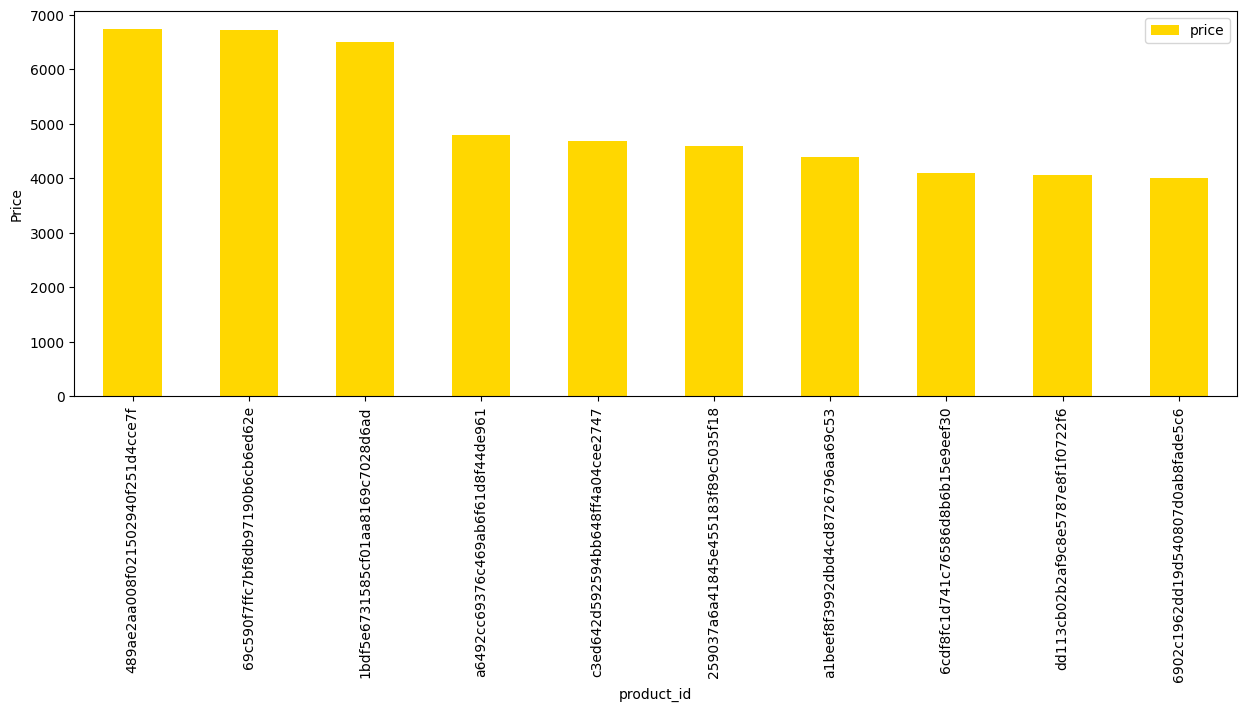

In [83]:
Top10ExpensiveProducts_chart = Top10ExpensiveProducts.plot(kind="bar", x="product_id",
                                                           figsize=(15,5), color="gold")
plt.ylabel("Price")
plt.show()


#### 2. Performing Customers / Sellers Segmentation

#### a. Divide the customers into groups based on the revenue generated


In [84]:
CustSeller_data = pd.merge(left=orders, right=order_items, how="inner", on="order_id")
CustSeller_data["revenue"] = CustSeller_data.price + CustSeller_data.freight_value

CustSeller_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,revenue
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:00,29.99,8.72,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:00,118.70,22.76,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:00,159.90,19.22,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:00,45.00,27.20,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:00,19.90,8.72,28.62


In [85]:
CustSegmentation = CustSeller_data[["customer_id", "revenue"]]

CustSegmentation.head()

,customer_id,revenue
0,9ef432eb6251297304e76186b10a928d,38.71
1,b0830fb4747a6c6d20dea0b8c802d7ef,141.46
2,41ce2a54c0b03bf3443c3d931a367089,179.12
3,f88197465ea7920adcdbec7375364d82,72.20
4,8ab97904e6daea8866dbdbc4fb7aad2c,28.62


In [86]:
# segment given to customer based on total revenue(which is spend for customer)

CustSegment_tb = CustSegmentation.groupby(by="customer_id").agg({"revenue":"sum"}).reset_index()

CustSegment_tb["segment"] = pd.cut(CustSegment_tb.revenue, bins=4,labels=["Silver","Gold", "Platinum", "Daimond"])

In [87]:
CustSegment_tb.sort_values(by="revenue")

,customer_id,revenue,segment
64612,a790343ca6f3fee08112d678b43aa7c5,9.59,Silver
9383,184e8e8e48937145eb96c721ef1f0747,10.07,Silver
54747,8e4bd65db637116b6b68109e4df21b84,10.89,Silver
1727,046f890135acc703faff4c1fc0c2d73c,11.56,Silver
81496,d2c63ad286e3ca9dd69218008d61ff81,11.62,Silver
...,...,...,...
24603,3fd6777bbce08a352fddd04e4a7cc8f6,6726.66,Gold
94398,f48d464a0baaea338cb25f816991ab1f,6922.21,Platinum
76948,c6e2731c5b391845f6800c97401a43a9,6929.31,Platinum
91284,ec5b2ba62e574342386871631fafd3fc,7274.88,Platinum


    
####  b. Divide the sellers into groups based on the revenue generated

In [88]:
SellerSegmentation = CustSeller_data[[ "seller_id", "revenue"]].rename(columns={"revenue":"sales"})

SellerSegmentation

,seller_id,sales
0,3504c0cb71d7fa48d967e0e4c94d59d9,38.71
1,289cdb325fb7e7f891c38608bf9e0962,141.46
2,4869f7a5dfa277a7dca6462dcf3b52b2,179.12
3,66922902710d126a0e7d26b0e3805106,72.20
4,2c9e548be18521d1c43cde1c582c6de8,28.62
...,...,...
112645,1f9ab4708f3056ede07124aad39a2554,195.00
112646,d50d79cb34e38265a8649c383dcffd48,271.01
112647,a1043bafd471dff536d0c462352beb48,220.58
112648,a1043bafd471dff536d0c462352beb48,220.58


In [89]:
# segment given to seller based on total sales raised by them
segment_tb = SellerSegmentation.groupby(by="seller_id").agg({"sales":"sum"}).reset_index()

segment_tb["segment"] = pd.cut(segment_tb.sales, bins=4,labels=["Silver","Gold", "Platinum", "Daimond"])

In [90]:
segment_tb

,seller_id,sales,segment
0,0015a82c2db000af6aaaf3ae2ecb0532,2748.06,Silver
1,001cca7ae9ae17fb1caed9dfb1094831,33934.17,Silver
2,001e6ad469a905060d959994f1b41e4f,267.94,Silver
3,002100f778ceb8431b7a1020ff7ab48f,2028.16,Silver
4,003554e2dce176b5555353e4f3555ac8,139.38,Silver
...,...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,79.52,Silver
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,2828.66,Silver
3092,ffeee66ac5d5a62fe688b9d26f83f534,2259.55,Silver
3093,fffd5413c0700ac820c7069d66d98c89,11896.04,Silver


#### 3. Cross-Selling (Which products are selling together)
#### Hint: We need to find which of the top 10 combinations of products are selling together in
#### each transaction. (combination of 2 or 3 buying together)

In [91]:
CrossSell_tb = pd.merge(left=orders, right=order_items, how="inner", on="order_id")[["order_id", "customer_id", "order_purchase_timestamp","product_id"]]

CrossSell_tb = CrossSell_tb[CrossSell_tb.duplicated(subset=["customer_id", "order_purchase_timestamp"], keep=False)]

CrossSell_tb = pd.merge(left=CrossSell_tb, right=product[["product_id", "product_category_name"]], how="inner", on="product_id")

CrossSell_tb

,order_id,customer_id,order_purchase_timestamp,product_id,product_category_name
0,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,2017-05-16 19:41:00,08574b074924071f4e201e151b152b4e,Garden_Tools
1,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,2017-05-16 19:41:00,08574b074924071f4e201e151b152b4e,Garden_Tools
2,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,2018-06-04 00:00:00,d70f38e7f79c630f8ea00c993897042c,Baby
3,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,2018-06-04 00:00:00,9451e630d725c4bb7a5a206b48b99486,Baby
4,9faeb9b2746b9d7526aef5acb08e2aa0,79183cd650e2bb0d475b0067d45946ac,2018-07-26 14:39:00,f48eb5c2fde13ca63664f0bb05f55346,Sports_Leisure
...,...,...,...,...,...
23782,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,2017-08-10 21:21:00,0df37da38a30a713453b03053d60d3f7,Sports_Leisure
23783,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,2017-10-04 19:57:00,c982dbea53b864f4d27c1d36f14b6053,Toys
23784,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,2017-10-04 19:57:00,49d2e2460386273b195e7e59b43587c3,Toys
23785,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:00,d1c427060a0f73f6b889a5c7c61f2ac4,Computers_Accessories


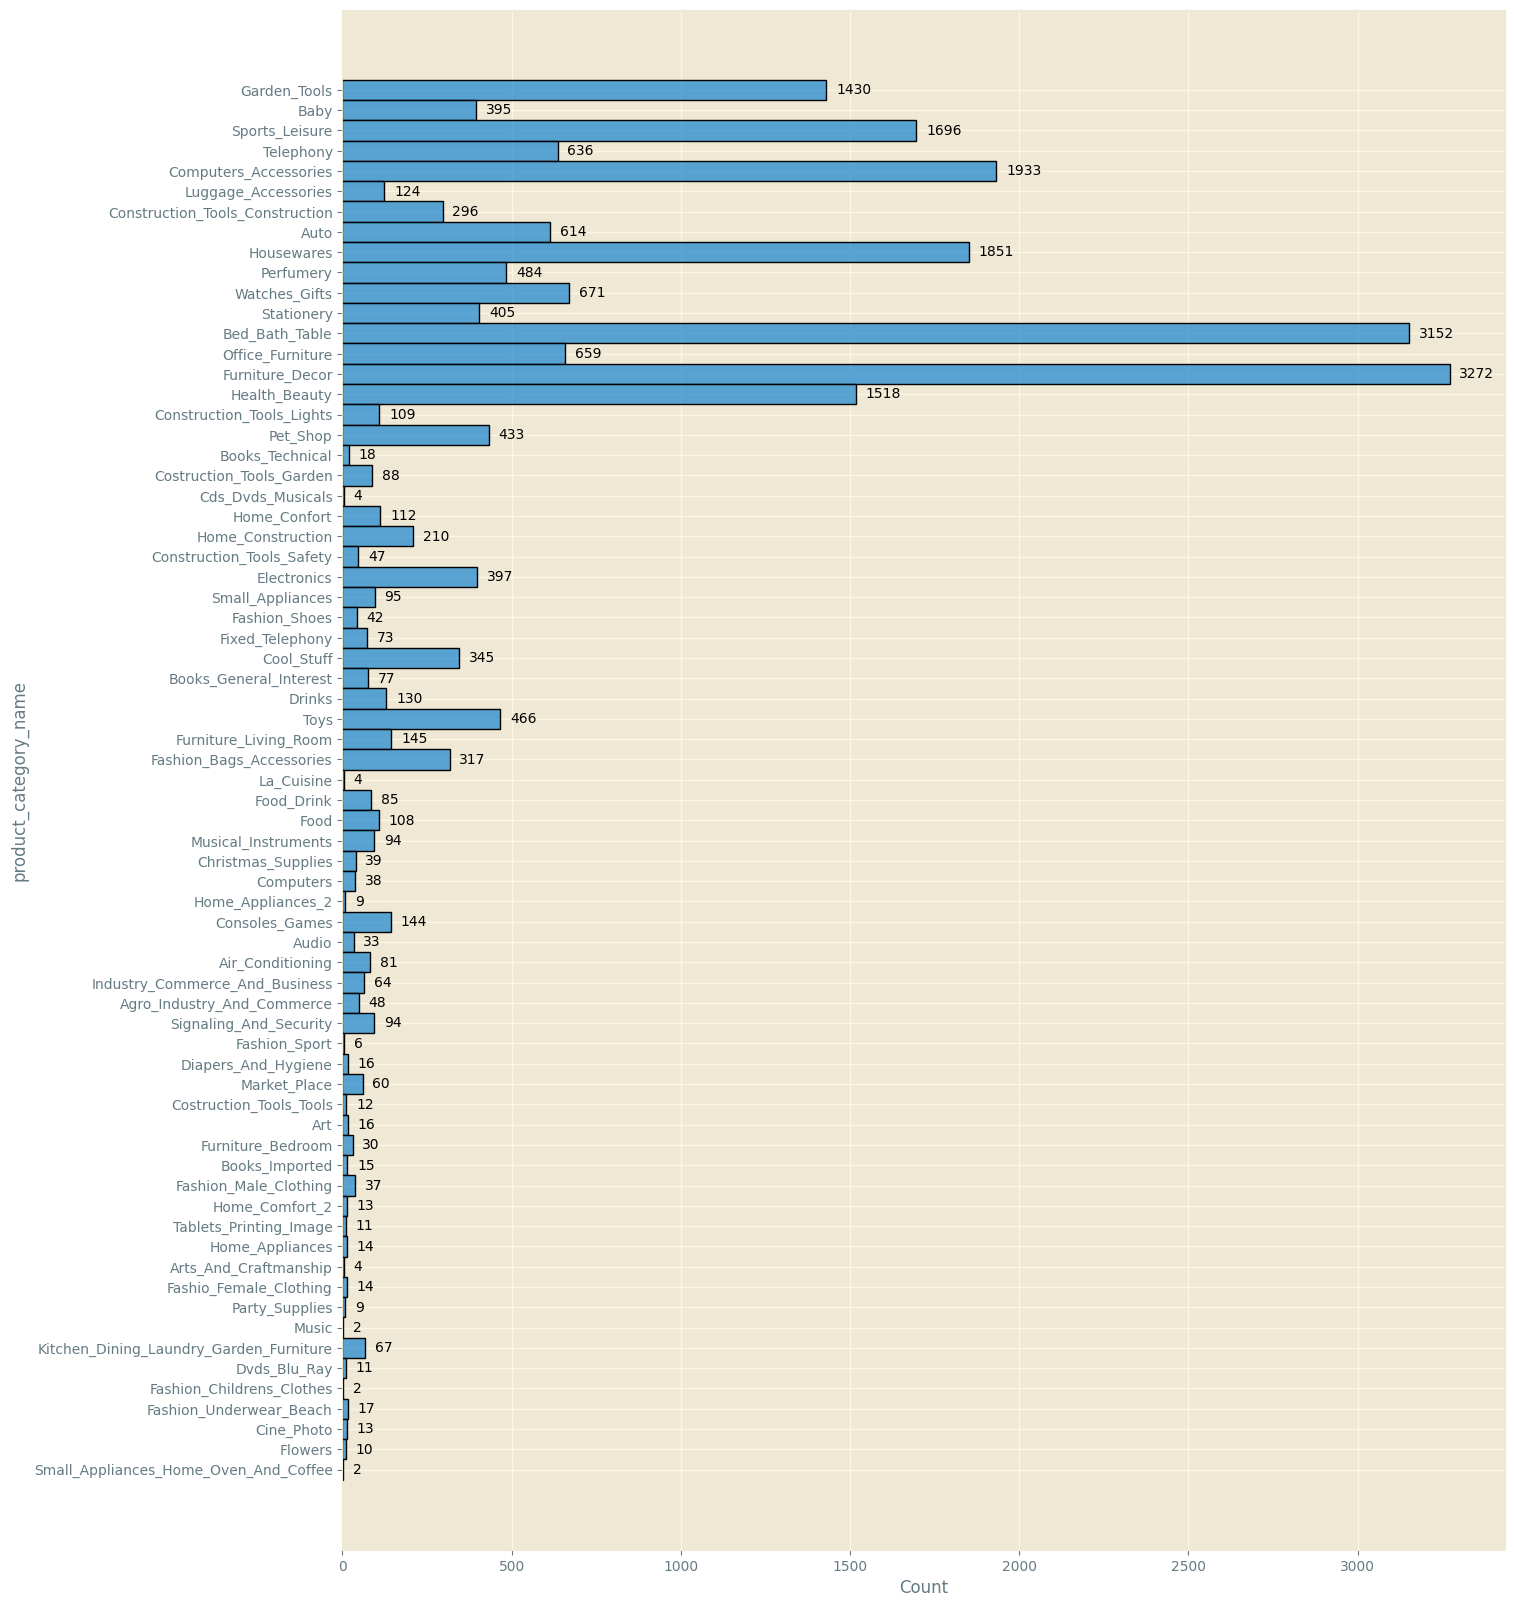

In [92]:
plt.figure(figsize=(15,20))
plt.style.use("Solarize_Light2")

cross_sellChart = sns.histplot(y=CrossSell_tb.product_category_name)

for bar in cross_sellChart.containers:
    lables= [x.get_width() for x in bar]
    cross_sellChart.bar_label(container=bar, labels=lables, label_type="edge", padding=7)

plt.show()

####  4. Payment Behaviour
#### a. How customers are paying?


In [93]:
payment_tb = pd.merge(left=orders, right=order_payment, how="inner", on="order_id")

payment_tb.payment_type.value_counts().reset_index().rename(columns={"index":"payment methods"})

,payment_type,count
0,credit_card,76795
1,UPI,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


#### b. Which payment channels are used by most customers?

In [94]:
payment_tb.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,175
order_delivered_carrier_date,1888
order_delivered_customer_date,3132
order_estimated_delivery_date,0
payment_sequential,0
payment_type,0


In [95]:
payment_tb.dropna(axis="columns", inplace=True)

In [96]:
cust_payment = payment_tb[["customer_id","payment_type"]]

cust_payment = cust_payment.drop_duplicates()

In [97]:
CustPaymentUsage =cust_payment.groupby(by="payment_type").agg({"customer_id":"count"}
                                           ).reset_index().rename(columns={"customer_id":"payment_mode_usage"})
# CustPaymentUsage
CustPaymentUsage.payment_mode_usage = np.round((CustPaymentUsage.payment_mode_usage/cust_payment.shape[0])*100 , 2 )

In [98]:
CustPaymentUsage.sort_values(by="payment_mode_usage", ascending=False, inplace=True, ignore_index=True)

CustPaymentUsage

,payment_type,payment_mode_usage
0,credit_card,75.24
1,UPI,19.46
2,voucher,3.80
3,debit_card,1.50
4,not_defined,0.00


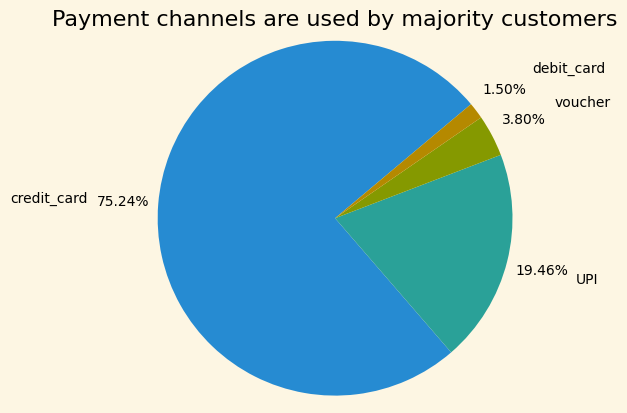

In [99]:
# plt.figure(figsize=(10,5))
plt.title("Payment channels are used by majority customers")
plt.pie(x=CustPaymentUsage.payment_mode_usage[0:4], labels=CustPaymentUsage.payment_type[0:4],startangle=40 ,
        autopct="%0.2f%%", pctdistance=1.2, labeldistance=1.4, radius=1.2)

plt.show()

### 5. Customer satisfaction towards category & product
#### a. Which categories (top 10) are maximum rated & minimum rated?


In [100]:
A = pd.merge(left=orders, right=order_review, how="left", on="order_id")

B = pd.merge(left=A, right=customer, how="left", on="customer_id")

C = pd.merge(left=B, right=order_items, how="left", on="order_id")

Df = pd.merge(left=C, right=product, how="left", on="product_id")

Df.drop(labels=["order_status","order_purchase_timestamp","order_estimated_delivery_date","review_answer_timestamp",
               "customer_unique_id", "price","freight_value","order_approved_at","order_delivered_carrier_date",
                "order_delivered_customer_date","customer_zip_code_prefix","customer_city","customer_state",
                "shipping_limit_date","product_name_lenght","product_description_lenght",
                "product_photos_qty","product_weight_g","product_length_cm","product_height_cm","product_width_cm"],
        axis=1,
        inplace=True)

Df

,order_id,customer_id,review_id,review_score,review_creation_date,order_item_id,product_id,seller_id,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,Housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,8d5266042046a06655c8db133d120ba5,4,2018-08-08,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,Perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,e73b67b67587f7644d5bd1a52deb1b01,5,2018-08-18,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,Auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,359d03e676b3c069f62cadba8dd3f6e8,5,2017-12-03,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,Pet_Shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,e50934924e227544ba8246aeb3770dd4,5,2018-02-17,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,Stationery
...,...,...,...,...,...,...,...,...,...
114095,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,29bb71b2760d0f876dfa178a76bc4734,4,2018-03-01,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,Baby
114096,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,371579771219f6db2d830d50805977bb,5,2017-09-22,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,Home_Appliances_2
114097,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,8ab6855b9fe9b812cd03a480a25058a1,2,2018-01-26,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,Computers_Accessories
114098,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,8ab6855b9fe9b812cd03a480a25058a1,2,2018-01-26,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,Computers_Accessories


##### TOP 10 MAXIMUM RATED CATEGORIES

In [101]:
Top10Max_categories = Df.groupby(by="product_category_name").agg({"order_id":"count"}
                                          ).rename(columns={"order_id":"no_of_orders"}
                                                  ).sort_values(by="no_of_orders", ascending=False).reset_index().head(10)

In [102]:
Top10Max_categories

,product_category_name,no_of_orders
0,Bed_Bath_Table,11272
1,Health_Beauty,9728
2,Sports_Leisure,8701
3,Furniture_Decor,8416
4,Computers_Accessories,7895
5,Housewares,6989
6,Watches_Gifts,6001
7,Telephony,4550
8,Garden_Tools,4361
9,Auto,4256


In [103]:
Cat_MaxReview_tb = pd.merge(left=Top10Max_categories, right=Df, how="left", on="product_category_name")


In [104]:
print("TOP MAXIMUM RATED CATEGORIES")
Cat_MaxReview_tb.groupby(by="product_category_name").agg({"review_score":"sum"}).sort_values(by="review_score", ascending=False).reset_index()

TOP MAXIMUM RATED CATEGORIES


,product_category_name,review_score
0,Bed_Bath_Table,43636
1,Health_Beauty,40121
2,Sports_Leisure,35616
3,Furniture_Decor,32716
4,Computers_Accessories,30953
5,Housewares,28235
6,Watches_Gifts,24016
7,Telephony,17907
8,Garden_Tools,17572
9,Auto,17193


##### TOP 10 MINIMUM RATED CATEGORIES

In [105]:
Top10Min_categories = Df.groupby(by="product_category_name").agg({"order_id":"count"}
                                          ).rename(columns={"order_id":"no_of_orders"}
                                                  ).sort_values(by="no_of_orders", ascending=True).reset_index().head(10)

In [106]:
Top10Min_categories

,product_category_name,no_of_orders
0,Security_And_Services,2
1,Fashion_Childrens_Clothes,8
2,La_Cuisine,14
3,Cds_Dvds_Musicals,14
4,Arts_And_Craftmanship,24
5,Home_Comfort_2,30
6,Fashion_Sport,31
7,Flowers,33
8,Music,38
9,Furniture_Mattress_And_Upholstery,38


In [107]:
Cat_MinReview_tb = pd.merge(left=Top10Min_categories, right=Df, how="left", on="product_category_name")


In [108]:
print("TOP MINIMUM RATED CATEGORIES")
Cat_MinReview_tb.groupby(by="product_category_name").agg({"review_score":"sum"}).sort_values(by="review_score", ascending=True).reset_index()

TOP MINIMUM RATED CATEGORIES


,product_category_name,review_score
0,Security_And_Services,5
1,Fashion_Childrens_Clothes,36
2,La_Cuisine,53
3,Cds_Dvds_Musicals,65
4,Arts_And_Craftmanship,99
5,Home_Comfort_2,101
6,Fashion_Sport,132
7,Flowers,139
8,Furniture_Mattress_And_Upholstery,145
9,Music,160


#### b. Which products (top10) are maximum rated & minimum rated?

##### TOP 10 MAXIMUM RATED PRODUCTS

In [109]:
Top10Max_products = Df.groupby(by="product_id").agg({"order_id":"count"}
                                          ).rename(columns={"order_id":"no_of_orders"}
                                                  ).sort_values(by="no_of_orders", ascending=False).reset_index().head(10)

In [110]:
Top10Max_products

,product_id,no_of_orders
0,aca2eb7d00ea1a7b8ebd4e68314663af,527
1,99a4788cb24856965c36a24e339b6058,491
2,422879e10f46682990de24d770e7f83d,487
3,389d119b48cf3043d311335e499d9c6b,392
4,368c6c730842d78016ad823897a372db,391
5,53759a2ecddad2bb87a079a1f1519f73,375
6,d1c427060a0f73f6b889a5c7c61f2ac4,343
7,53b36df67ebb7c41585e8d54d6772e08,323
8,154e7e31ebfa092203795c972e5804a6,293
9,3dd2a17168ec895c781a9191c1e95ad7,274


In [111]:
Product_MaxReview_tb = pd.merge(left=Top10Max_products, right=Df, how="left", on="product_id")

In [112]:
print("TOP 10 MAXIMUM RATED PRODUCTS")
Product_MaxReview_tb.groupby(by="product_id").agg({"review_score":"sum"}).sort_values(by="review_score", ascending=False).reset_index()

TOP 10 MAXIMUM RATED PRODUCTS


,product_id,review_score
0,aca2eb7d00ea1a7b8ebd4e68314663af,2112
1,422879e10f46682990de24d770e7f83d,1920
2,99a4788cb24856965c36a24e339b6058,1896
3,389d119b48cf3043d311335e499d9c6b,1612
4,368c6c730842d78016ad823897a372db,1531
5,53759a2ecddad2bb87a079a1f1519f73,1448
6,d1c427060a0f73f6b889a5c7c61f2ac4,1432
7,53b36df67ebb7c41585e8d54d6772e08,1348
8,154e7e31ebfa092203795c972e5804a6,1264
9,3dd2a17168ec895c781a9191c1e95ad7,1147


##### TOP 10 MINIMUM RATED PRODUCTS

In [113]:
Top10Min_products = Df.groupby(by="product_id").agg({"order_id":"count"}
                                          ).rename(columns={"order_id":"no_of_orders"}
                                                  ).sort_values(by="no_of_orders", ascending=True).reset_index().head(10)

In [114]:
Top10Min_products

,product_id,no_of_orders
0,ffcfaba393e8ef71937c6e8421bc2868,1
1,006c67546bfe73c33b83f6bd1ad58c36,1
2,00716e5593e8eea55dbe7a29b72a70bc,1
3,fff28f91211774864a1000f918ed00cc,1
4,00088930e925c41fd95ebfe695fd2655,1
5,0009406fd7479715e4bef61dd91f2462,1
6,000d9be29b5207b54e86aa1b1ac54872,1
7,0011c512eb256aa0dbbb544d8dffcf6e,1
8,001b237c0e9bb435f2e54071129237e9,1
9,001c5d71ac6ad696d22315953758fa04,1


In [115]:
Product_MinReview_tb = pd.merge(left=Top10Min_products, right=Df, how="left", on="product_id")

In [116]:
print("TOP 10 MINIMUM RATED PRODUCTS")
Product_MinReview_tb.groupby(by="product_id").agg({"review_score":"sum"}).sort_values(by="review_score", ascending=True).reset_index()

TOP 10 MINIMUM RATED PRODUCTS


,product_id,review_score
0,0009406fd7479715e4bef61dd91f2462,1
1,0011c512eb256aa0dbbb544d8dffcf6e,1
2,fff28f91211774864a1000f918ed00cc,1
3,00088930e925c41fd95ebfe695fd2655,4
4,00716e5593e8eea55dbe7a29b72a70bc,4
5,000d9be29b5207b54e86aa1b1ac54872,5
6,001c5d71ac6ad696d22315953758fa04,5
7,001b237c0e9bb435f2e54071129237e9,5
8,006c67546bfe73c33b83f6bd1ad58c36,5
9,ffcfaba393e8ef71937c6e8421bc2868,5



#### c. Average rating by location, seller, product, category, month etc.

In [117]:
Df = pd.merge(left=Df, right=seller.loc[::,["seller_id", "seller_state"]], how="left", on="seller_id")

In [118]:
Df["review_creation_month"] = Df.review_creation_date.apply(lambda x: x.strftime("%Y-%m"))

In [119]:
AvgRatings_tb = Df.groupby(by=["seller_state","seller_id",
                               "product_id","product_category_name",
                               "review_creation_month"]).agg({"review_score":"mean"}).reset_index()

In [120]:
AvgRatings_tb.review_score = np.round(AvgRatings_tb.review_score, 2)

In [121]:
AvgRatings_tb.sort_values(by=["seller_state","seller_id","product_id",
                              "review_creation_month",
                              "review_score"], ascending=[True,True,True,True,False], inplace=True)

In [122]:
AvgRatings_tb.reset_index(drop=True, inplace=True)

In [123]:
AvgRatings_tb

,seller_state,seller_id,product_id,product_category_name,review_creation_month,review_score
0,Andhra Pradesh,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,Small_Appliances,2017-10,3.67
1,Andhra Pradesh,001e6ad469a905060d959994f1b41e4f,093cd981b714bcdff182b427d87fc8fc,Sports_Leisure,2018-08,1.00
2,Andhra Pradesh,002100f778ceb8431b7a1020ff7ab48f,00d62d0388b0786d730a1aaed91c0ae0,Furniture_Decor,2017-12,5.00
3,Andhra Pradesh,002100f778ceb8431b7a1020ff7ab48f,158102fe543dbaeb84d87811bfe06d0d,Furniture_Decor,2017-10,2.00
4,Andhra Pradesh,002100f778ceb8431b7a1020ff7ab48f,158102fe543dbaeb84d87811bfe06d0d,Furniture_Decor,2017-11,5.00
...,...,...,...,...,...,...
60944,West Bengal,b56906f7fd1696e043f1bcce164c487b,bfbc74aa36c840ed231ac481b9b0199d,Health_Beauty,2018-02,5.00
60945,West Bengal,b56906f7fd1696e043f1bcce164c487b,e4568ff2a2b3b7249d96a870f3563c8b,Health_Beauty,2018-04,1.00
60946,West Bengal,b56906f7fd1696e043f1bcce164c487b,f08d78a6e7eecc6f3f51fad33ce7be1b,Health_Beauty,2018-07,5.00
60947,West Bengal,b56906f7fd1696e043f1bcce164c487b,f748cb764b18656b28d466eff3cbda8d,Health_Beauty,2018-01,5.00


/tmp/ipython-input-2905396916.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  chart = sns.barplot(x=AvgRatings_tb.review_score,
/tmp/ipython-input-2905396916.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=AvgRatings_tb.review_score,
/tmp/ipython-input-2905396916.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_yticklabels(chart.get_yticklabels(), rotation=360, horizontalalignment='right')


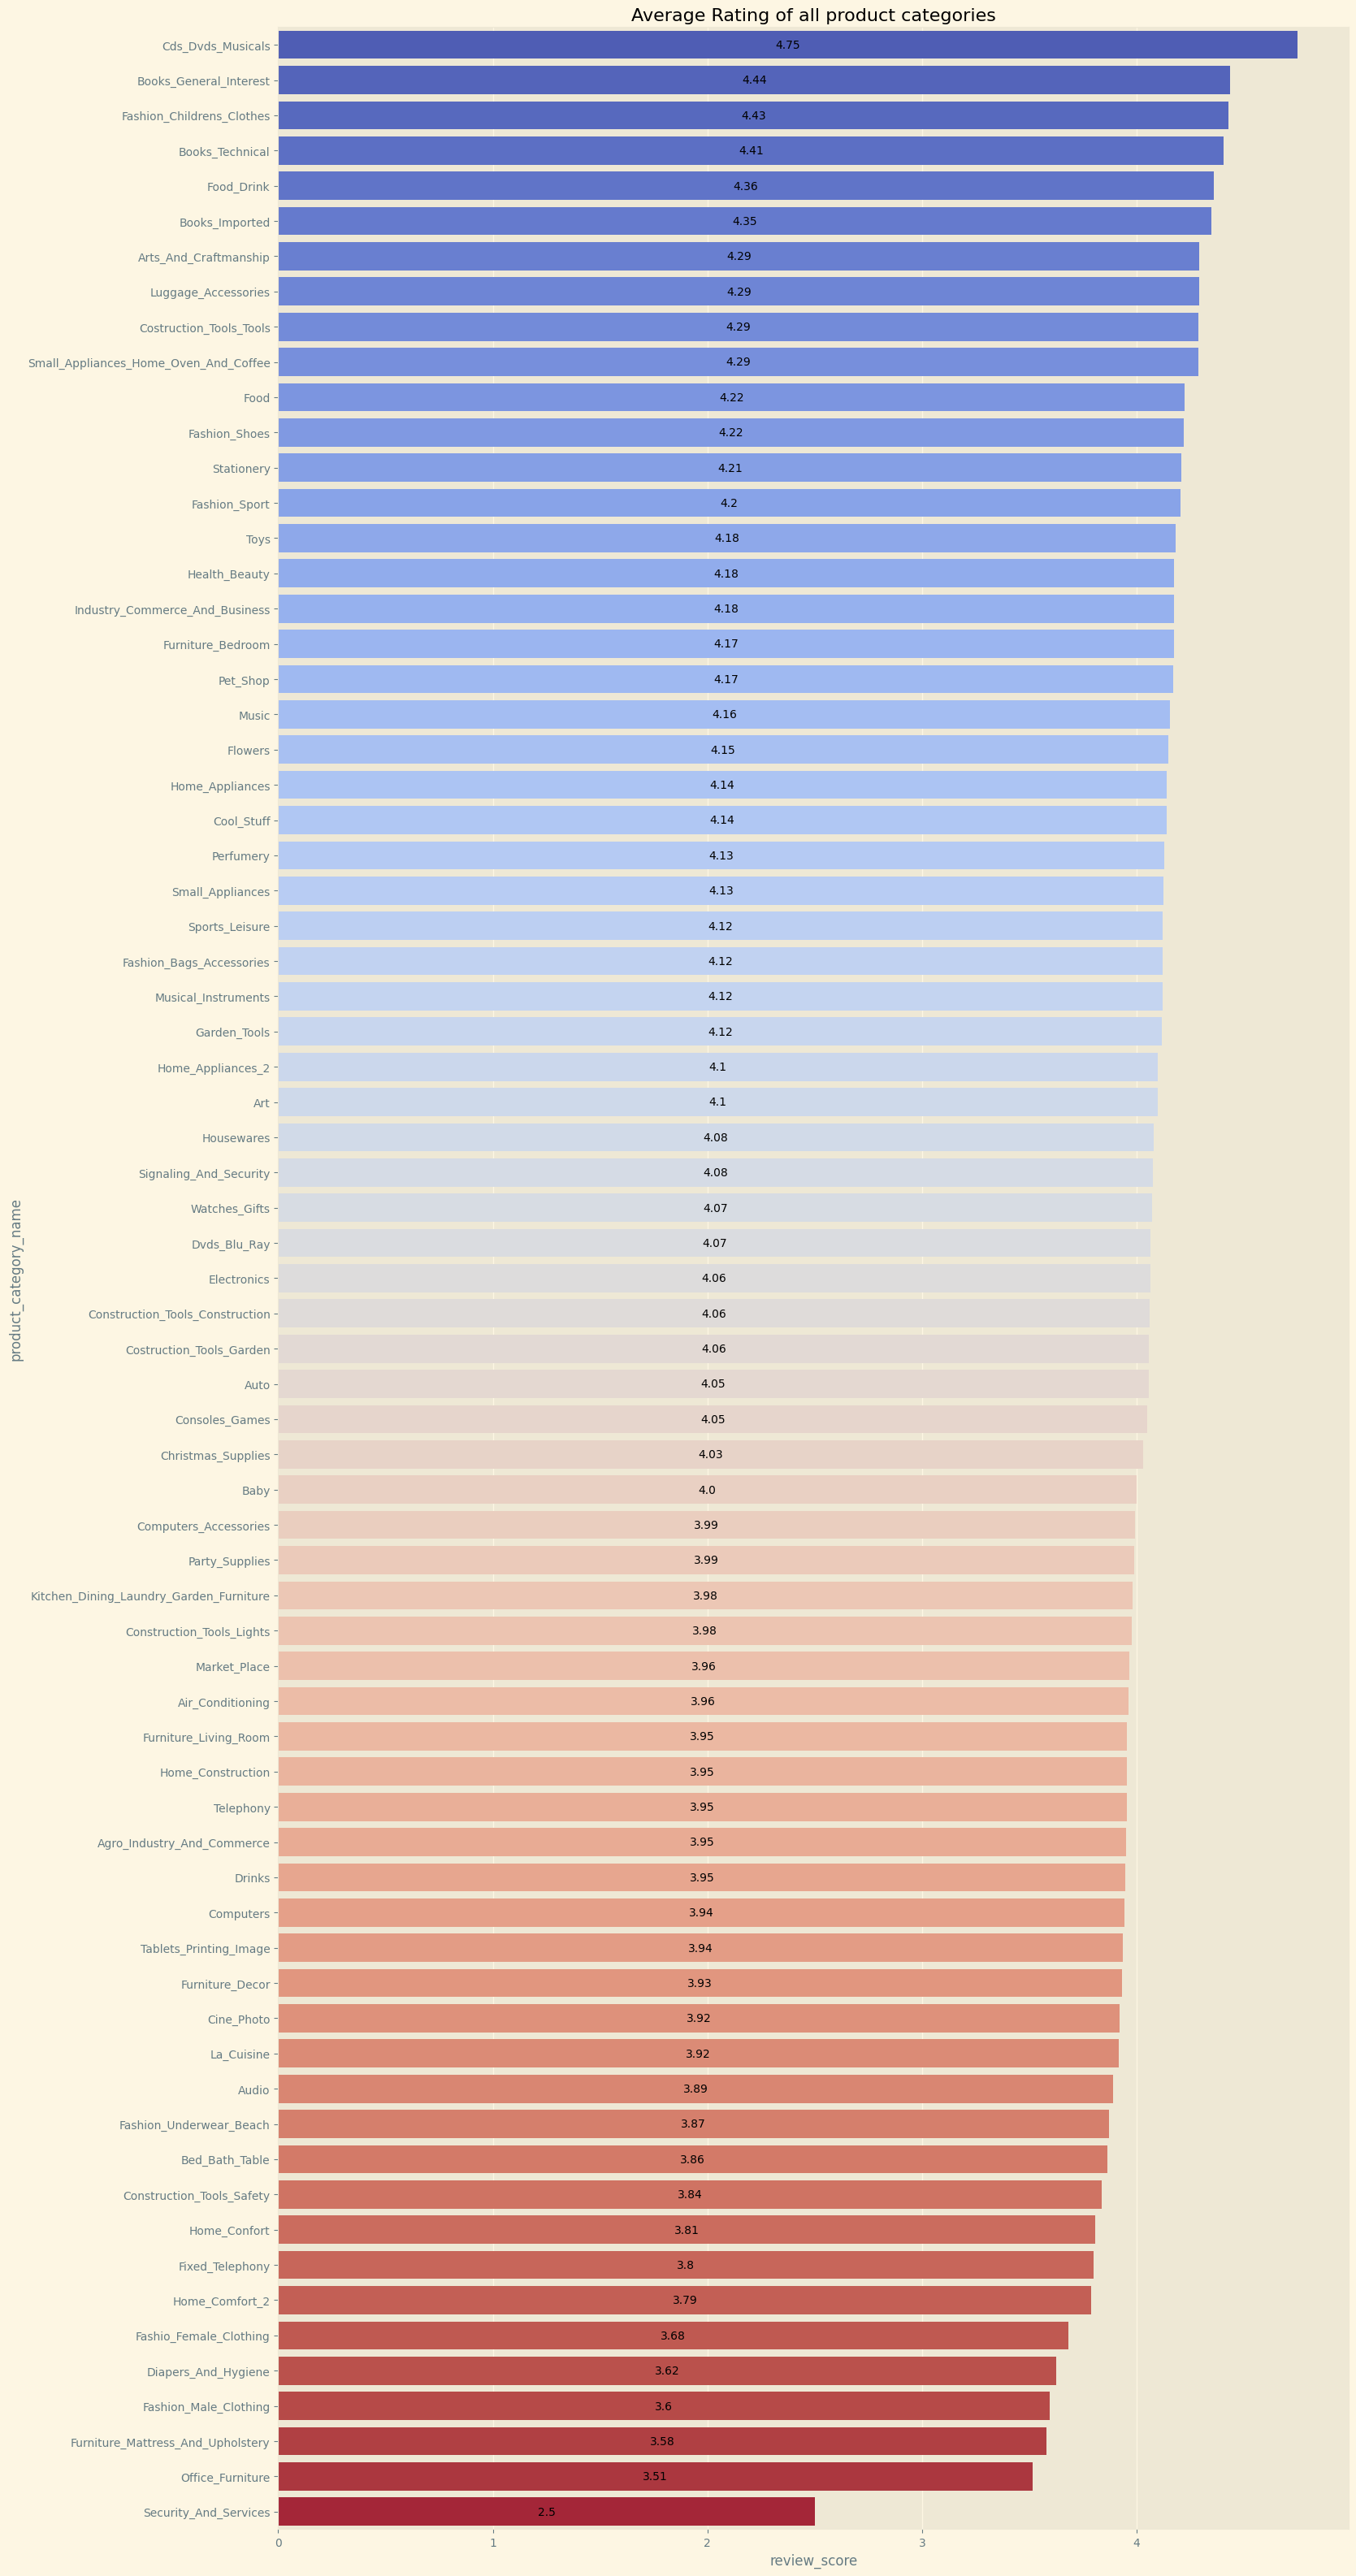

In [124]:
plt.figure(figsize=(17,40))

color_palette = sns.color_palette(palette="coolwarm", n_colors=AvgRatings_tb.product_category_name.nunique())

Yaxis_order =AvgRatings_tb.groupby(by="product_category_name").agg({"review_score":"mean"}).sort_values(by="review_score",
                                                                                                        ascending=False).index
chart = sns.barplot(x=AvgRatings_tb.review_score,
                    y=AvgRatings_tb.product_category_name,
                    estimator=np.mean,
                    palette=color_palette,
                    order=Yaxis_order,
                    ci=0)

chart.set_yticklabels(chart.get_yticklabels(), rotation=360, horizontalalignment='right')


for bar in chart.containers:
    lables= [np.round(x.get_width(), 2) for x in bar]
    chart.bar_label(container=bar, labels=lables, label_type="center")

plt.grid(visible=True, which="minor", axis="x")
plt.title("Average Rating of all product categories")
plt.show()

In [125]:
# plt.figure(figsize=(17,40))

# color_palette = sns.color_palette(palette="coolwarm", n_colors=AvgRatings_tb.product_id.nunique())

# Yaxis_order =AvgRatings_tb.groupby(by="product_id").agg({"review_score":"mean"}).sort_values(by="review_score",
#                                                                                                         ascending=False).index
# chart = sns.barplot(x=AvgRatings_tb.review_score,
#                     y=AvgRatings_tb.product_id,
#                     estimator=np.mean,
#                     palette=color_palette,
#                     order=Yaxis_order,
#                     ci=0)

# chart.set_yticklabels(chart.get_yticklabels(), rotation=360, horizontalalignment='right')


# for bar in chart.containers:
#     lables= [np.round(x.get_width(), 2) for x in bar]
#     chart.bar_label(container=bar, labels=lables, label_type="center")

# plt.grid(visible=True, which="minor", axis="x")
# plt.title("Average Rating of all product categories")
# plt.show()